In [ ]:
!pip install kaggle pandas --quiet

In [ ]:
# prompt: pip install pycaret 2 stable version
!pip install pycaret==2.3.10 --quiet

  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
!gdown 1seOAJxGY0MxdR90-emKqGFY0ejUcp8tn

Downloading...
From: https://drive.google.com/uc?id=1seOAJxGY0MxdR90-emKqGFY0ejUcp8tn
To: /content/kaggle.json
100% 69.0/69.0 [00:00<00:00, 217kB/s]


In [ ]:
!kaggle datasets download -d hakansaritas/dataset-for-apriori-analysis

Dataset URL: https://www.kaggle.com/datasets/hakansaritas/dataset-for-apriori-analysis
License(s): unknown
  0% 0.00/1.00k [00:00<?, ?B/s]
100% 1.00k/1.00k [00:00<00:00, 2.06MB/s]


In [ ]:
!pip install mlxtend --quiet

In [ ]:
!unzip dataset-for-apriori-analysis.zip
!rm dataset-for-apriori-analysis.zip

Archive:  dataset-for-apriori-analysis.zip
replace guitar_apriori_analysis.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

data = pd.read_csv('guitar_apriori_analysis.csv')
data.head()

,products,String,Bridge,String Pegs,Tuning Keys,Nut,Pick Guard,Fret,Saddle,Pick,Tuner
0,"('Nut', 'Saddle', 'Tuner')",0,0,0,0,1,0,0,1,0,1
1,"('Tuning Keys', 'Nut', 'Pick Guard')",0,0,0,1,1,1,0,0,0,0
2,"('Nut', 'Pick Guard', 'Fret', 'Pick')",0,0,0,0,1,1,1,0,1,0
3,"('Bridge', 'Tuning Keys', 'Nut', 'Pick Guard')",0,1,0,1,1,1,0,0,0,0
4,"('String Pegs', 'Fret', 'Saddle', 'Tuner')",0,0,1,0,0,0,1,1,0,1


In [ ]:

from mlxtend.frequent_patterns import apriori, association_rules
transactions = []
for i in range(0, len(data)):
  transactions.append([str(data.values[i,j]) for j in range(0, len(data.columns))])
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(0),"(('Bridge', 'Nut', 'Fret', 'Pick'))",1.00,0.01,0.01,0.01,1.0,0.0,1.0,0.0
1,"(('Bridge', 'Nut', 'Fret', 'Pick'))",(0),0.01,1.00,0.01,1.00,1.0,0.0,inf,0.0
2,"(('Bridge', 'Nut', 'Fret', 'Pick'))",(1),0.01,1.00,0.01,1.00,1.0,0.0,inf,0.0
3,(1),"(('Bridge', 'Nut', 'Fret', 'Pick'))",1.00,0.01,0.01,0.01,1.0,0.0,1.0,0.0
4,(0),"(('Bridge', 'Nut', 'Fret', 'Tuner'))",1.00,0.01,0.01,0.01,1.0,0.0,1.0,0.0


In [ ]:
from mlxtend.frequent_patterns import association_rules

# Generate association rules with a minimum lift of 1
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# View the first few rules
rules.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(0),"(('Bridge', 'Nut', 'Fret', 'Pick'))",1.00,0.01,0.01,0.01,1.0,0.0,1.0,0.0
1,"(('Bridge', 'Nut', 'Fret', 'Pick'))",(0),0.01,1.00,0.01,1.00,1.0,0.0,inf,0.0
2,"(('Bridge', 'Nut', 'Fret', 'Pick'))",(1),0.01,1.00,0.01,1.00,1.0,0.0,inf,0.0
3,(1),"(('Bridge', 'Nut', 'Fret', 'Pick'))",1.00,0.01,0.01,0.01,1.0,0.0,1.0,0.0
4,(0),"(('Bridge', 'Nut', 'Fret', 'Tuner'))",1.00,0.01,0.01,0.01,1.0,0.0,1.0,0.0


In [ ]:
# Association rules with a minimum confidence of 0.5
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# View the refined rules
rules.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(('Bridge', 'Nut', 'Fret', 'Pick'))",(0),0.01,1.0,0.01,1.0,1.0,0.0,inf,0.0
1,"(('Bridge', 'Nut', 'Fret', 'Pick'))",(1),0.01,1.0,0.01,1.0,1.0,0.0,inf,0.0
2,"(('Bridge', 'Nut', 'Fret', 'Tuner'))",(0),0.01,1.0,0.01,1.0,1.0,0.0,inf,0.0
3,"(('Bridge', 'Nut', 'Fret', 'Tuner'))",(1),0.01,1.0,0.01,1.0,1.0,0.0,inf,0.0
4,"(('Bridge', 'Nut', 'Pick Guard', 'Pick'))",(0),0.01,1.0,0.01,1.0,1.0,0.0,inf,0.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


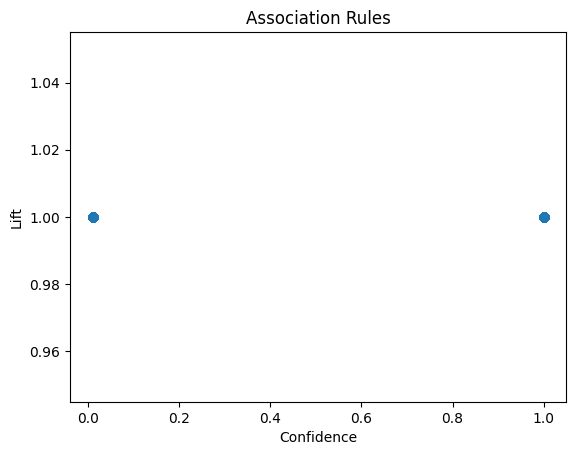

In [ ]:
import matplotlib.pyplot as plt

# Plot lift vs confidence
plt.scatter(rules['confidence'], rules['lift'], alpha=0.5)
plt.title('Association Rules')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.show()